## TASK - 6 Prediction Using Decision Tree
## Level - Intermediate
## Name : S. Jatin

### Importing Libraries

In [39]:
import numpy as np
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns

### Loading the datset

In [46]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1 cm,3.5,1.4,0.2,Iris-setosa
1,2,4.9 cm,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2 cm,Iris-setosa
3,4,4.6,3.1,1.5,0.2 cm,Iris-setosa
4,5,5,3.6,1.4,0.2,Iris-setosa


In [47]:
df.shape

(150, 6)

In [48]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [49]:
Species = df['Species'].unique()
Species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

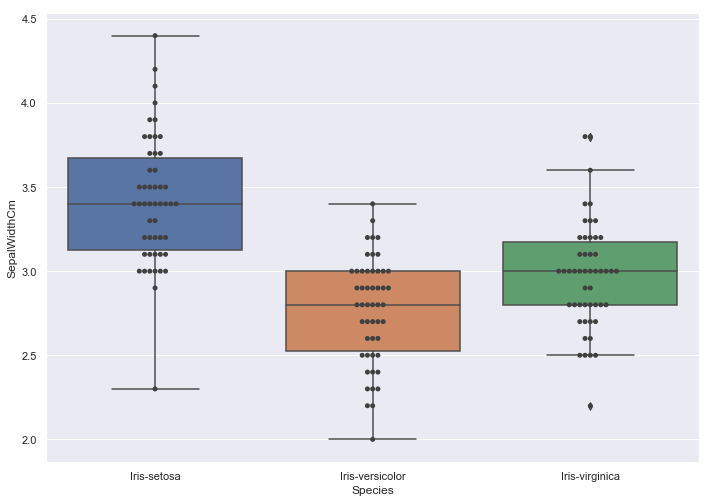

In [50]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x='Species', y='SepalWidthCm', data=df)
ax = sns.swarmplot(x='Species', y="SepalWidthCm", data=df, color=".25")

In [68]:
X=iris.data
Y=iris.target
Y=Y.astype(int)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [70]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

## Relation between columns of the dataset

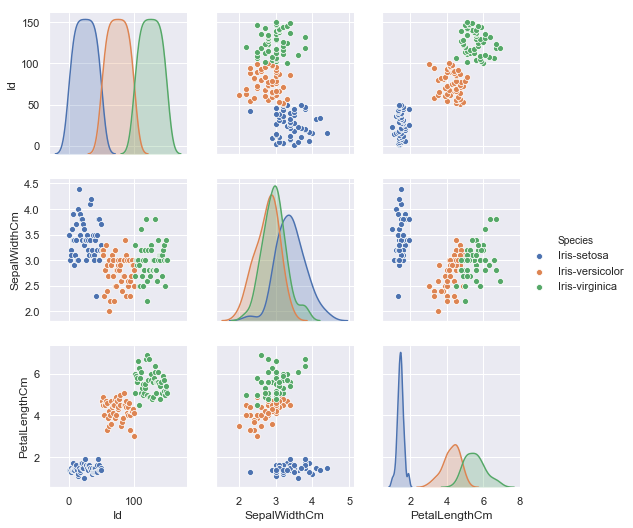

In [75]:
sns.pairplot(df, hue='Species')

### Decision Tree Model

In [11]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=0)
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


print("Confusion Matrix -- ")
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score --")
print(accuracy_score(Y_test,Y_pred))
print("Classification Report --")
print(classification_report(Y_test,Y_pred))

Confusion Matrix -- 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy Score --
0.9777777777777777
Classification Report --
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



From above output we can say that
### For Gini:
our accuracy is 0.9555 means our model is 95.55% accurate. In precision,High Precision means that false positive rate is low we have got 0.94 precision which is good. we got recall as 0.94 which is very good for this model as it is the above range of 0.5. f1-score gives better result than accuracy especially when we have uneven class distribution,Accuracy works better if false positive and false negative have similar cost if it is different then we have to look into recall and precision. In our case accuracy score and f1 score not differ much,f1 score is 0.96

### For Entropy:
our accuracy is 0.9777~=0.98 means our model is 98% accurate. In precision,High Precision means that false positive rate is low we have got 0.95 precision which is good. we got recall as 0.91 which is very good for this model as it is the above range of 0.5. f1-score gives better result than accuracy especially when we have uneven class distribution,Accuracy works better if false positive and false negative have similar cost if it is different then we have to look into recall and precision. In our case accuracy score and f1 score not differ much,f1 score is 0.98

In [15]:
print(list(zip(df.columns,model_DecisionTree.feature_importances_)))

[('sepal length (cm)', 0.0), ('sepal width (cm)', 0.021504642271982528), ('petal length (cm)', 0.3976695134630798), ('petal width (cm)', 0.5808258442649378)]


In [19]:
from sklearn import tree
with open("model_DecisionTree.txt","w") as f:
    f=tree.export_graphviz(model_DecisionTree,feature_names=df.columns[:],out_file=f)

In [71]:
model_tree = DecisionTreeClassifier(max_depth = 10).fit(X, y)

## Correlation between columns using heatmap

[]

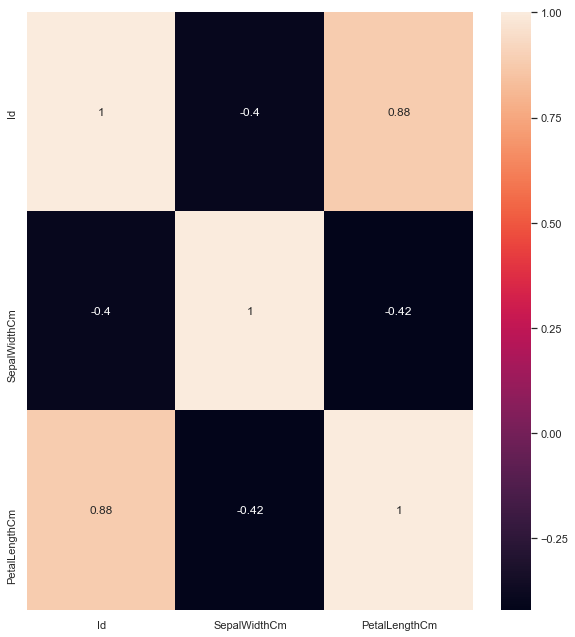

In [74]:
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()